<a href="https://colab.research.google.com/github/p204667/SI101-Atividades/blob/master/Atividade3_fut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dadosCampeonato=pd.read_csv("Tabela_Clubes.csv",decimal=',')
dadosCampeonato.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
dadosCampeonato.Ano=dadosCampeonato.Ano.add(1)
dadosCampeonato.rename(columns={'Derrotas':'Empates','Empates':'Derrotas'},inplace=True)
dadosCampeonato.head(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Ano,Pos.,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,2018,18,America-MG,10,10,18,30:47,-17,51,24.8,0,27350000,536000


In [0]:
dados=dadosCampeonato.drop(range(0,20),axis=0)
APrever=dadosCampeonato[dadosCampeonato.Ano == 2018]

In [0]:
#Passo 1:Importando os modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

#Usando as colunas vitorias, empates e derrotas
Como sabemos a classificacao é dada por **3*vitorias + empates** 

In [0]:
Xtest=dados.loc[:,['Vitorias','Derrotas','Empates']]#passo 3
ytest=dados['Pos.'] 

Xprev=APrever.loc[:,['Vitorias','Derrotas','Empates']]#a ser previsto

In [0]:
model=LinearRegression(fit_intercept=True) #passo 2
#pontuacao para divisao ideal
score=cross_val_score(model,Xtest,ytest,cv=9)
score.mean()

0.9167181958634048

In [0]:
modelTree=DecisionTreeClassifier()
scoreTree=cross_val_score(modelTree,Xtest,ytest,cv=9)
scoreTree.mean()

0.23333333333333334

In [0]:
modelKNC=KNeighborsClassifier()
scoreKNC=cross_val_score(modelKNC,Xtest,ytest,cv=9)
scoreKNC.mean()

0.2277777777777778

In [0]:
modelGauss=GaussianNB()
scoreGauss=cross_val_score(modelGauss,Xtest,ytest,cv=9)
scoreGauss.mean()

0.3277777777777777

Devido ao que tem maior pontuação, iremos utilizar o modelo de regressão linear

In [0]:
model.fit(Xtest,ytest)#passo 4
yPrev=model.predict(Xprev)

In [0]:
colocacao=pd.DataFrame({'Clubes':APrever.Clubes,'PosReal':APrever['Pos.'],'ordem':yPrev}) 
colocacao.sort_values('ordem',inplace=True)
colocacao.head()

,Clubes,PosReal,ordem
13,Palmeiras,1,-3.145171
9,Flamengo,2,0.639517
12,Internacional,3,2.269723
11,Gremio,4,3.731170
16,Sao Paulo,5,5.361376


In [0]:
#para deixar em ordem de numeros inteiros
comparacao=pd.DataFrame({'Clubes':colocacao.Clubes,'PosReal':colocacao.PosReal})#pega os times na ordem e a posicao q deveria estar 
comparacao.reset_index(drop=True,inplace=True)#retira o indice anterior e atualiza com as posicoes do 0 
comparacao.index=comparacao.index+1 #para retirar a colocacao 0 da lista
comparacao['Correto']=comparacao.index==comparacao.PosReal
accuracy_score(comparacao.index,comparacao.PosReal)

0.9

Text(0.5, 15.0, 'valorReal')

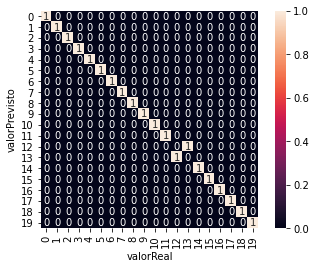

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
yReal=APrever['Pos.']
matrix=confusion_matrix(comparacao.index,comparacao.PosReal)
sns.heatmap(matrix,square=True,annot=True)
plt.ylabel('valorPrevisto')
plt.xlabel('valorReal')

#Analise sem a pontuação para tentar prever o resultado

In [0]:
Xdados=dados.loc[:,['Qtd_Jogadores','Idade_Media','Estrangeiros','Valor_total','Media_Valor']]
ydados=dados['Pos.'] 
Xprevisao=APrever.loc[:,['Qtd_Jogadores','Idade_Media','Estrangeiros','Valor_total','Media_Valor']]

In [0]:
modelGauss=GaussianNB()
scoreGauss2=cross_val_score(modelGauss,Xdados,ydados,cv=LeaveOneOut())
scoreGauss2.mean()

0.07777777777777778

In [0]:
modelTree2=DecisionTreeClassifier()
scoreTree2=cross_val_score(modelTree2,Xdados,ydados,cv=LeaveOneOut())
scoreTree2.mean()

0.027777777777777776

In [0]:
modelKNC2=KNeighborsClassifier()
scoreKNC2=cross_val_score(modelKNC2,Xdados,ydados,cv=LeaveOneOut())
scoreKNC2.mean()

0.05

Precisão muito baixa para esses modelos dado esses parâmetros